
# EDA

## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss
import numpy.random as nr
import datetime
from glob import glob

nr.seed(4242)

## Data Ingress

In [9]:
# Data Ingress
def clean_filename(fname):
    return fname.split('_')[-1].split('.')[0]

#bitcoin data
btc_data = {}
bitcoin_files = glob("data/bitcoin/*.csv")
for fname in bitcoin_files:
    btc_data[clean_filename(fname)] = pd.read_csv(fname)
    
gold_data = pd.read_csv("data/gold/XAU_5m_data_2004_to_2024-09-20.csv")

## Gold Dataset 

### Summary Info

In [19]:
print("Gold Columns: ",', '.join(gold_data.columns))
print("Gold Data Shape: ",gold_data.shape)
gold_data.describe()

Gold Columns:  Date, Time, Open, High, Low, Close, Volume
Gold Data Shape:  (1354003, 7)


,Open,High,Low,Close,Volume
count,1.354003e+06,1.354003e+06,1.354003e+06,1.354003e+06,1.354003e+06
mean,1.323327e+03,1.323808e+03,1.322838e+03,1.323326e+03,2.927679e+02
std,4.606202e+02,4.607758e+02,4.604639e+02,4.606229e+02,3.718187e+02
min,3.811000e+02,3.813000e+02,3.811000e+02,3.813000e+02,1.000000e+00
25%,1.085100e+03,1.085480e+03,1.084730e+03,1.085100e+03,6.300000e+01
50%,1.291590e+03,1.291910e+03,1.291260e+03,1.291590e+03,1.970000e+02
75%,1.704430e+03,1.705225e+03,1.703640e+03,1.704425e+03,3.890000e+02
max,2.599360e+03,2.600000e+03,2.594090e+03,2.599330e+03,1.986700e+04


In [15]:
gold_data.dtypes

Date       object
Time       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [20]:
gold_data.head()

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,07:15,384.0,384.1,384.0,384.0,3
1,2004.06.11,07:20,384.1,384.1,383.8,383.8,3
2,2004.06.11,07:25,383.8,384.3,383.8,384.3,6
3,2004.06.11,07:30,383.8,383.8,383.8,383.8,2
4,2004.06.11,07:35,383.8,384.3,383.6,383.8,6


In [21]:
gold_data.tail()

,Date,Time,Open,High,Low,Close,Volume
1353998,2024.09.20,02:25,2587.25,2587.25,2586.92,2587.04,237
1353999,2024.09.20,02:30,2587.04,2587.25,2587.02,2587.21,403
1354000,2024.09.20,02:35,2587.22,2587.26,2586.75,2587.14,480
1354001,2024.09.20,02:40,2587.15,2587.16,2586.84,2587.08,318
1354002,2024.09.20,02:45,2587.06,2587.57,2586.99,2587.18,306


### Data Cleaning

In [24]:
# standardizing date and time into one column
gold_data['DateTime'] = pd.to_datetime(gold_data.Date + ' ' + gold_data.Time)

gold_data.drop(['Date', 'Time'], axis=1, inplace=True)
gold_data.head()

,Open,High,Low,Close,Volume,DateTime
0,384.0,384.1,384.0,384.0,3,2004-06-11 07:15:00
1,384.1,384.1,383.8,383.8,3,2004-06-11 07:20:00
2,383.8,384.3,383.8,384.3,6,2004-06-11 07:25:00
3,383.8,383.8,383.8,383.8,2,2004-06-11 07:30:00
4,383.8,384.3,383.6,383.8,6,2004-06-11 07:35:00


In [25]:
gold_data.dtypes

Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
DateTime    datetime64[ns]
dtype: object

### Summary Statistics

In [28]:
gold_numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
gold_data.loc[:,gold_numeric_columns].describe().round(decimals=2)

,Open,High,Low,Close,Volume
count,1354003.00,1354003.00,1354003.00,1354003.00,1354003.00
mean,1323.33,1323.81,1322.84,1323.33,292.77
std,460.62,460.78,460.46,460.62,371.82
min,381.10,381.30,381.10,381.30,1.00
25%,1085.10,1085.48,1084.73,1085.10,63.00
50%,1291.59,1291.91,1291.26,1291.59,197.00
75%,1704.43,1705.22,1703.64,1704.43,389.00
max,2599.36,2600.00,2594.09,2599.33,19867.00


### Visualizations

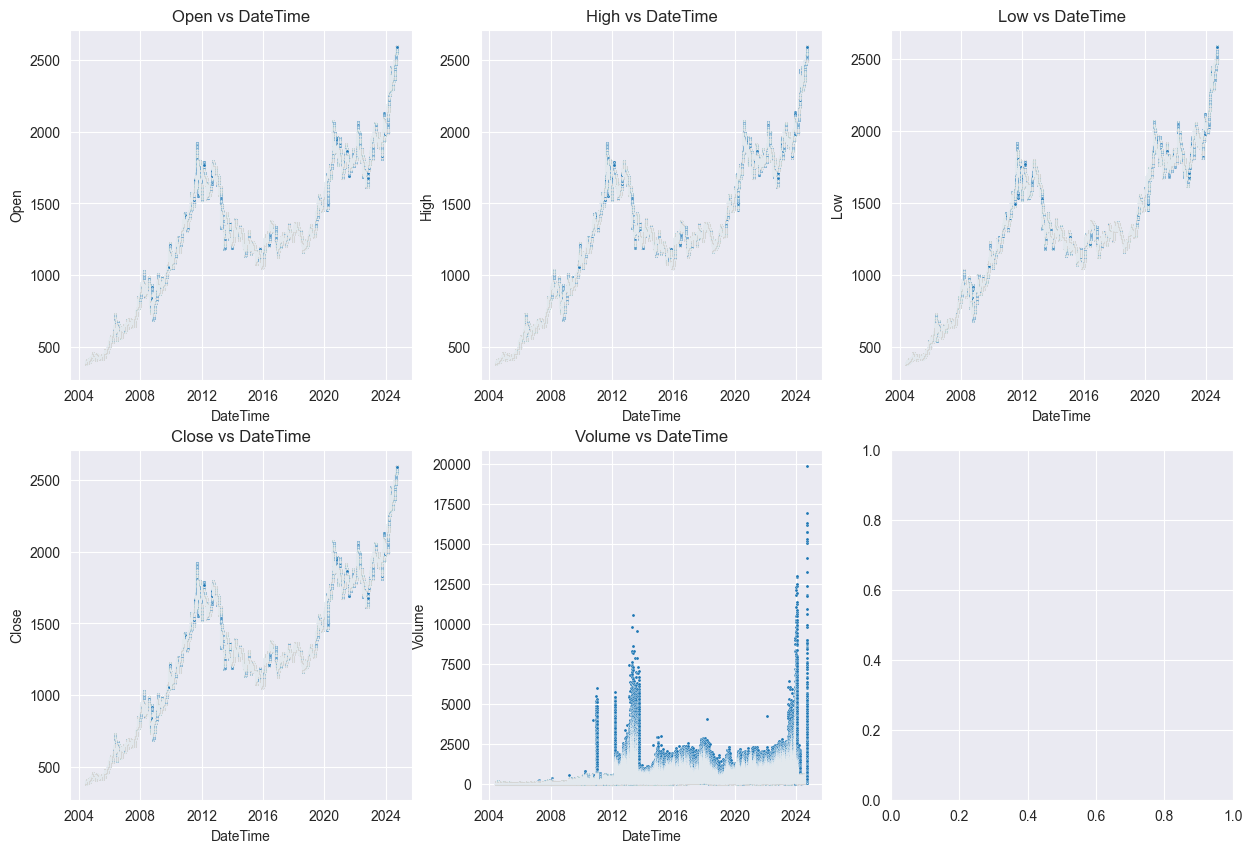

In [38]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(gold_numeric_columns):
    _ = sns.scatterplot(data=gold_data,x='DateTime', y=col, ax=ax[i], s=5)
    ax[i].set_title(f"{col} vs DateTime")
    ax[i].set_xlabel('DateTime')
    ax[i].set_ylabel(col)

,Open,High,Low,Close,Volume,DateTime
0,384.00,384.10,384.00,384.00,3,2004-06-11 07:15:00
1,384.10,384.10,383.80,383.80,3,2004-06-11 07:20:00
2,383.80,384.30,383.80,384.30,6,2004-06-11 07:25:00
3,383.80,383.80,383.80,383.80,2,2004-06-11 07:30:00
4,383.80,384.30,383.60,383.80,6,2004-06-11 07:35:00
...,...,...,...,...,...,...
1352354,2512.51,2512.54,2512.35,2512.35,44,2024-09-12 02:20:00
1352355,2512.32,2512.52,2512.23,2512.31,62,2024-09-12 02:25:00
1352615,2558.17,2558.37,2557.97,2558.09,61,2024-09-13 01:15:00
1352628,2557.96,2558.07,2557.71,2557.75,62,2024-09-13 02:20:00
